<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.609442,85.603436,59.891441,90.341494,0.002791,310.448605,310.451438,-0.002833
1,0.0,1.0,43.784534,58.209840,86.382809,46.137626,0.012922,244.527731,244.526037,0.001694
2,0.0,2.0,83.530304,33.535897,47.985373,82.631283,0.056116,257.738973,257.701938,0.037035
3,0.0,3.0,79.800141,46.293416,70.174351,96.516166,0.008480,302.792555,302.806848,-0.014293
4,0.0,4.0,32.615130,28.308036,28.472003,81.068265,0.012197,180.475632,180.480352,-0.004720
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,25.057181,28.652183,73.957382,54.111423,-0.046488,191.731682,191.779475,-0.047793
29996,999.0,26.0,68.424043,22.142652,47.721593,32.016174,0.056245,180.360707,180.328727,0.031980
29997,999.0,27.0,42.529995,28.734893,91.001533,68.411958,0.058210,240.736589,240.694499,0.042090
29998,999.0,28.0,84.869324,93.964185,52.885400,36.759650,-0.014270,278.464289,278.480337,-0.016047


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.609442  85.603436  59.891441  90.341494  0.002791  310.448605   
      1.0    43.784534  58.209840  86.382809  46.137626  0.012922  244.527731   
      2.0    83.530304  33.535897  47.985373  82.631283  0.056116  257.738973   
      3.0    79.800141  46.293416  70.174351  96.516166  0.008480  302.792555   
      4.0    32.615130  28.308036  28.472003  81.068265  0.012197  180.475632   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   25.057181  28.652183  73.957382  54.111423 -0.046488  191.731682   
      26.0   68.424043  22.142652  47.721593  32.016174  0.056245  180.360707   
      27.0   42.529995  28.734893  91.001533  68.411958  0.058210  240.736589   
      28.0   84.869324  93.964185  52.885400  36.759650 -0.014270  278.464289   
      29.0   40.745545  56.294034  82.471020  34.313508 -0.019121  223.804987   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    310.451438 -0.002833  
      1.0    244.526037  0.001694  
      2.0    257.701938  0.037035  
      3.0    302.806848 -0.014293  
      4.0    180.480352 -0.004720  
...                 ...       ...  
999.0 25.0   191.779475 -0.047793  
      26.0   180.328727  0.031980  
      27.0   240.694499  0.042090  
      28.0   278.480337 -0.016047  
      29.0   223.821124 -0.016137  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.609442  85.603436  59.891441  90.341494  0.002791  310.448605   
      1.0    43.784534  58.209840  86.382809  46.137626  0.012922  244.527731   
      2.0    83.530304  33.535897  47.985373  82.631283  0.056116  257.738973   
      3.0    79.800141  46.293416  70.174351  96.516166  0.008480  302.792555   
      4.0    32.615130  28.308036  28.472003  81.068265  0.012197  180.475632   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   25.057181  28.652183  73.957382  54.111423 -0.046488  191.731682   
      26.0   68.424043  22.142652  47.721593  32.016174  0.056245  180.360707   
      27.0   42.529995  28.734893  91.001533  68.411958  0.058210  240.736589   
      28.0   84.869324  93.964185  52.885400  36.759650 -0.014270  278.464289   
      29.0   40.745545  56.294034  82.471020  34.313508 -0.019121  223.804987   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    310.451438 -0.002833  
      1.0    244.526037  0.001694  
      2.0    257.701938  0.037035  
      3.0    302.806848 -0.014293  
      4.0    180.480352 -0.004720  
...                 ...       ...  
999.0 25.0   191.779475 -0.047793  
      26.0   180.328727  0.031980  
      27.0   240.694499  0.042090  
      28.0   278.480337 -0.016047  
      29.0   223.821124 -0.016137  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.609442,85.603436,59.891441,90.341494,0.002791,310.448605,310.451438,-0.002833
1,0.0,1.0,43.784534,58.209840,86.382809,46.137626,0.012922,244.527731,244.526037,0.001694
2,0.0,2.0,83.530304,33.535897,47.985373,82.631283,0.056116,257.738973,257.701938,0.037035
3,0.0,3.0,79.800141,46.293416,70.174351,96.516166,0.008480,302.792555,302.806848,-0.014293
4,0.0,4.0,32.615130,28.308036,28.472003,81.068265,0.012197,180.475632,180.480352,-0.004720
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,25.057181,28.652183,73.957382,54.111423,-0.046488,191.731682,191.779475,-0.047793
29996,999.0,26.0,68.424043,22.142652,47.721593,32.016174,0.056245,180.360707,180.328727,0.031980
29997,999.0,27.0,42.529995,28.734893,91.001533,68.411958,0.058210,240.736589,240.694499,0.042090
29998,999.0,28.0,84.869324,93.964185,52.885400,36.759650,-0.014270,278.464289,278.480337,-0.016047


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.609442  85.603436  59.891441  90.341494  0.002791  310.448605   
      1.0    43.784534  58.209840  86.382809  46.137626  0.012922  244.527731   
      2.0    83.530304  33.535897  47.985373  82.631283  0.056116  257.738973   
      3.0    79.800141  46.293416  70.174351  96.516166  0.008480  302.792555   
      4.0    32.615130  28.308036  28.472003  81.068265  0.012197  180.475632   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   25.057181  28.652183  73.957382  54.111423 -0.046488  191.731682   
      26.0   68.424043  22.142652  47.721593  32.016174  0.056245  180.360707   
      27.0   42.529995  28.734893  91.001533  68.411958  0.058210  240.736589   
      28.0   84.869324  93.964185  52.885400  36.759650 -0.014270  278.464289   
      29.0   40.745545  56.294034  82.471020  34.313508 -0.019121  223.804987   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    310.451438 -0.002833  
      1.0    244.526037  0.001694  
      2.0    257.701938  0.037035  
      3.0    302.806848 -0.014293  
      4.0    180.480352 -0.004720  
...                 ...       ...  
999.0 25.0   191.779475 -0.047793  
      26.0   180.328727  0.031980  
      27.0   240.694499  0.042090  
      28.0   278.480337 -0.016047  
      29.0   223.821124 -0.016137  

[30000 rows x 8 columns]

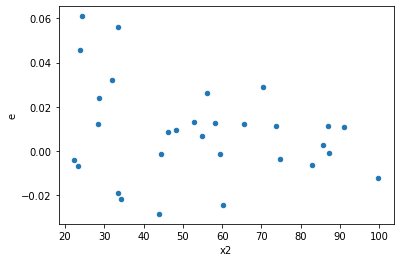

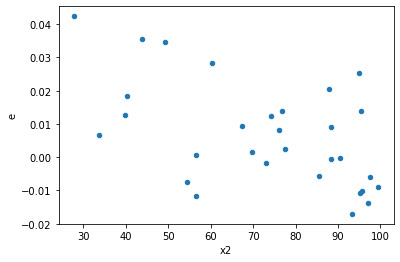

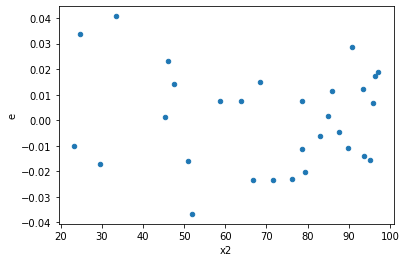

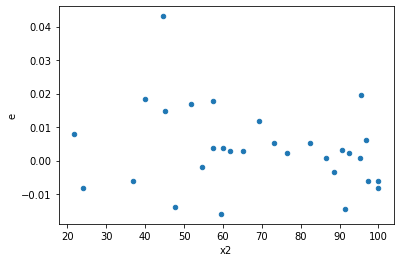

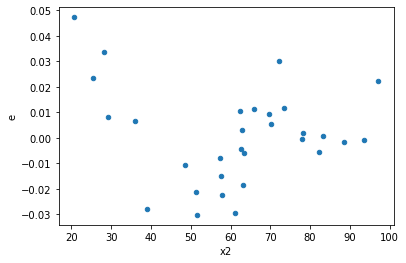

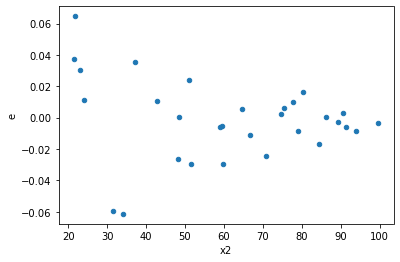

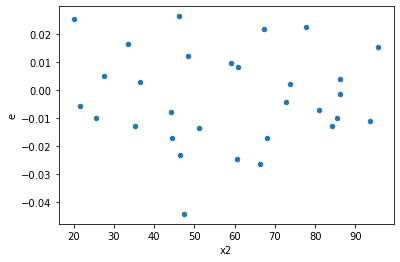

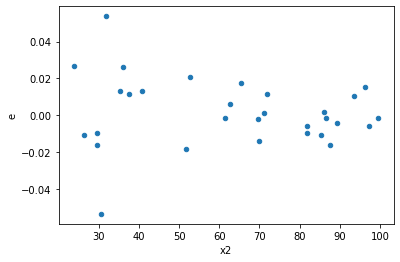

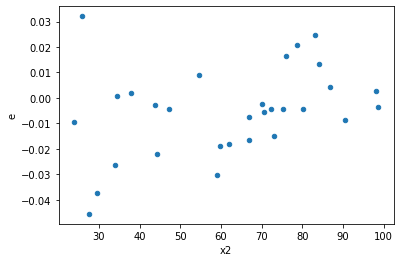

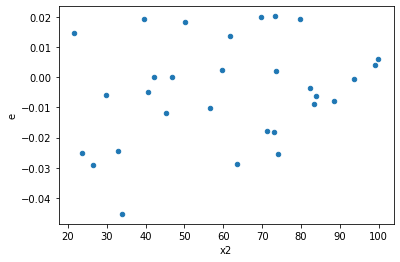

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,15.0,0.003185953933318942,0.007486663866694445,0.0004551362761884203,0.0004991109244462963,1.0966186405226708,0.8264107720943836,0.5867946139528082,0.4132053860471918,Reject001=1 : Homoscedasticity
1.0,12.0,10.0,0.0013241991521830787,0.0022499081304148145,0.00011034992934858989,0.00022499081304148144,2.0388849759091983,0.2677375592588087,0.8661312203705956,0.13386877962940436,Reject001=1 : Homoscedasticity
4.0,10.0,12.0,0.0017552135833117245,0.0025160952580796222,0.00017552135833117245,0.00020967460483996853,1.1945817126389597,0.7594809443132235,0.6202595278433882,0.3797404721566118,Reject001=1 : Homoscedasticity
7.0,12.0,10.0,0.0010026912226693,0.008221182134396285,8.355760188910834e-05,0.0008221182134396284,9.838939783488339,0.0010465124199785514,0.9994767437900107,0.0005232562099892757,Reject001=0 : Heteroscedasticity
8.0,15.0,7.0,0.0018623757382481285,0.0035228681072967936,0.00012415838254987524,0.0005032668724709705,4.0534264552681725,0.06892570403173193,0.965537147984134,0.034462852015865963,Reject001=1 : Homoscedasticity
14.0,9.0,13.0,0.000522302251570366,0.00754137332276957,5.8033583507818444e-05,0.0005801056402130439,9.99603341976789,0.0003203015465043091,0.9998398492267478,0.00016015077325215454,Reject001=0 : Heteroscedasticity
15.0,7.0,15.0,0.000662311499362108,0.005871745879611239,9.461592848030115e-05,0.00039144972530741595,4.137249737911889,0.020088252519637306,0.9899558737401813,0.010044126259818653,Reject001=1 : Homoscedasticity
16.0,11.0,11.0,0.0004511373913006746,0.007965978307184958,4.101249011824314e-05,0.0007241798461077235,17.65754393405131,4.0040617059533545e-05,0.9999799796914702,2.0020308529766773e-05,Reject001=0 : Heteroscedasticity
18.0,12.0,10.0,0.0024676561368203974,0.008834540591228986,0.00020563801140169977,0.0008834540591228986,4.296161264646407,0.027758881266153113,0.9861205593669234,0.013879440633076556,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,15.0,0.003185953933318942,0.007486663866694445,0.0004551362761884203,0.0004991109244462963,1.0966186405226708,0.8264107720943836,Reject001=1 : Homoscedasticity
1.0,12.0,10.0,0.0013241991521830787,0.0022499081304148145,0.00011034992934858989,0.00022499081304148144,2.0388849759091983,0.2677375592588087,Reject001=1 : Homoscedasticity
2.0,12.0,10.0,0.004379850038402924,0.0017133246574873827,0.0003649875032002437,0.00017133246574873827,0.4694200876645902,0.21530337134467567,Reject001=1 : Homoscedasticity
3.0,14.0,8.0,0.0024288622045628093,0.0006800275274456334,0.0001734901574687721,8.500344093070418e-05,0.4899611722699868,0.2322131759362617,Reject001=1 : Homoscedasticity
4.0,10.0,12.0,0.0017552135833117245,0.0025160952580796222,0.00017552135833117245,0.00020967460483996853,1.1945817126389597,0.7594809443132235,Reject001=1 : Homoscedasticity
5.0,15.0,7.0,0.012954368759640908,0.00021429877942229,0.0008636245839760606,3.061411134604143e-05,0.03544840190293847,3.077459110952096e-07,Reject001=0 : Heteroscedasticity
6.0,14.0,8.0,0.005297361769394555,0.0022218975189130393,0.0003783829835281825,0.0002777371898641299,0.7340107826055123,0.5854065089454197,Reject001=1 : Homoscedasticity
7.0,12.0,10.0,0.0010026912226693,0.008221182134396285,8.355760188910834e-05,0.0008221182134396284,9.838939783488339,0.0010465124199785514,Reject001=0 : Heteroscedasticity
8.0,15.0,7.0,0.0018623757382481285,0.0035228681072967936,0.00012415838254987524,0.0005032668724709705,4.0534264552681725,0.06892570403173193,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      781
Reject001=0 : Heteroscedasticity    219
Name: Result_test, dtype: int64